In [5]:
import pandas as pd

data = pd.read_csv("FitbitActivity(1-30-20).csv")
numeric_columns = data.select_dtypes(include=['number']).columns
data_grouped = data.groupby('egoid')[numeric_columns].mean()
print(data_grouped.head())

         egoid  complypercent   meanrate     sdrate         steps     floors  \
egoid                                                                          
10237  10237.0      88.072883  75.225984  18.228836  12415.061093  14.191351   
10469  10469.0      64.736364  89.279848  13.887779   7885.719136   6.809091   
10547  10547.0      79.178571  77.981580  17.558218  16509.214286  24.607143   
11002  11002.0      92.877622  78.571042  16.413416  13308.022145  18.502364   
11128  11128.0      80.448571  76.240607  12.981718   9121.991404  17.751462   

       sedentaryminutes  lightlyactiveminutes  fairlyactiveminutes  \
egoid                                                                
10237        650.421858            244.457923            47.045016   
10469       1003.060606            189.521212             8.757576   
10547        753.428571            226.750000            52.714286   
11002        711.407143            230.586905            52.179487   
11128        828.23

In [6]:
labels_data = pd.read_csv("BasicSurvey(3-6-20).csv")
labels_data.head()

C:\Users\Prawn\AppData\Local\Temp\ipykernel_17028\1458153116.py:1: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types. Specify dtype option on import or set low_memory=False.
  labels_data = pd.read_csv("BasicSurvey(3-6-20).csv")


,egoid,Tier,StudyStatus,RegionUS,US,StartDate_1,EndDate_1,gender_1,hs_1,hssex_1,...,gpa_fa2017,gpa_fa2018,gpa_sp2019,gpa_su2019,reshallyear1,reshallyear2,liveoffcampusyear3,reshallyear3,liveoffcampusyear4,reshallyear4
0,44869,Tier 1,In Study,South Atlantic,US address,05aug2015 17:25:30,05aug2015 19:09:07,Female,Public school,A mixture of boys and girls,...,3.513,NaN,NaN,NaN,299.0,299.0,On Campus,299.0,NaN,NaN
1,43516,Tier 1,In Study,Pacific,US address,10aug2015 18:26:07,10aug2015 19:27:45,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,283.0,283.0,On Campus,283.0,NaN,NaN
2,89411,Tier 3,In Study,Pacific,US address,NaN,NaN,Female,Private independent college-prep school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,287.0,287.0,NaN,NaN,NaN,NaN
3,74285,Tier 3,In Study,West South Central,US address,NaN,NaN,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,279.0,279.0,NaN,NaN,NaN,NaN
4,56527,Tier 3,In Study,Pacific,US address,NaN,NaN,Male,Private religious/parochial school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN


In [7]:
data_grouped.reset_index(inplace=True, drop=True)
labels_data.reset_index(inplace=True, drop=True)
merged_data = pd.merge(data_grouped, labels_data, on='egoid', how='inner')

print(merged_data.head())

     egoid  complypercent   meanrate     sdrate         steps     floors  \
0  10237.0      88.072883  75.225984  18.228836  12415.061093  14.191351   
1  10469.0      64.736364  89.279848  13.887779   7885.719136   6.809091   
2  10547.0      79.178571  77.981580  17.558218  16509.214286  24.607143   
3  11002.0      92.877622  78.571042  16.413416  13308.022145  18.502364   
4  11128.0      80.448571  76.240607  12.981718   9121.991404  17.751462   

   sedentaryminutes  lightlyactiveminutes  fairlyactiveminutes  \
0        650.421858            244.457923            47.045016   
1       1003.060606            189.521212             8.757576   
2        753.428571            226.750000            52.714286   
3        711.407143            230.586905            52.179487   
4        828.231928            166.234940            16.071429   

   veryactiveminutes  ...  gpa_fa2017  gpa_fa2018  gpa_sp2019  gpa_su2019  \
0          47.510383  ...         3.4         3.6         3.4        

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

health_columns = ['Health_1', 'Health_2', 'Health_3', 'Health_4', 'Health_5', 'Health_6', 'Health_7', 'Health_8']
for col in health_columns:
    merged_data[col] = merged_data[col].map(health_mapping)

merged_data['health_score'] = merged_data[health_columns].mean(axis=1)

features = ['meanrate', 'sdrate', 'steps', 'floors', 'sedentaryminutes', 
            'lightlyactiveminutes', 'fairlyactiveminutes', 'veryactiveminutes', 
            'lowrangemins', 'fatburnmins', 'cardiomins', 'peakmins', 
            'lowrangecal', 'fatburncal', 'cardiocal', 'peakcal']

X = merged_data[features] 

bins = [0, 1.5, 2.5, 3.5, 4]  
labels = [1, 2, 3, 4]  
merged_data['health_score_category'] = pd.cut(merged_data['health_score'], bins=bins, labels=labels)

y = merged_data['health_score_category']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(merged_data[['health_score']].head())


   health_score
0      2.571429
1      2.400000
2      3.000000
3      3.400000
4      3.000000


In [9]:
print(merged_data[['health_score_category']].head())


  health_score_category
0                     3
1                     2
2                     3
3                     3
4                     3


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier Performance:
Accuracy: 0.43315508021390375
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.19      0.54      0.28        26
           3       0.71      0.48      0.57       124
           4       0.30      0.20      0.24        35

    accuracy                           0.43       187
   macro avg       0.30      0.31      0.27       187
weighted avg       0.55      0.43      0.46       187



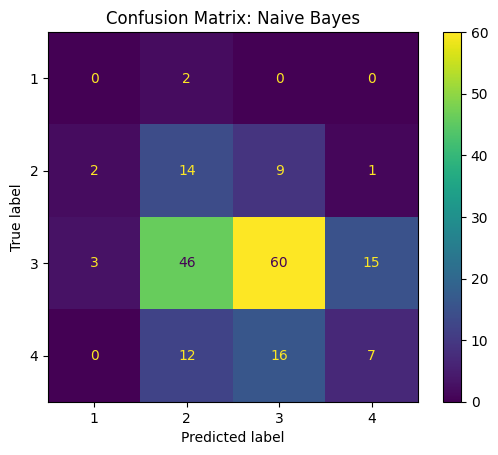

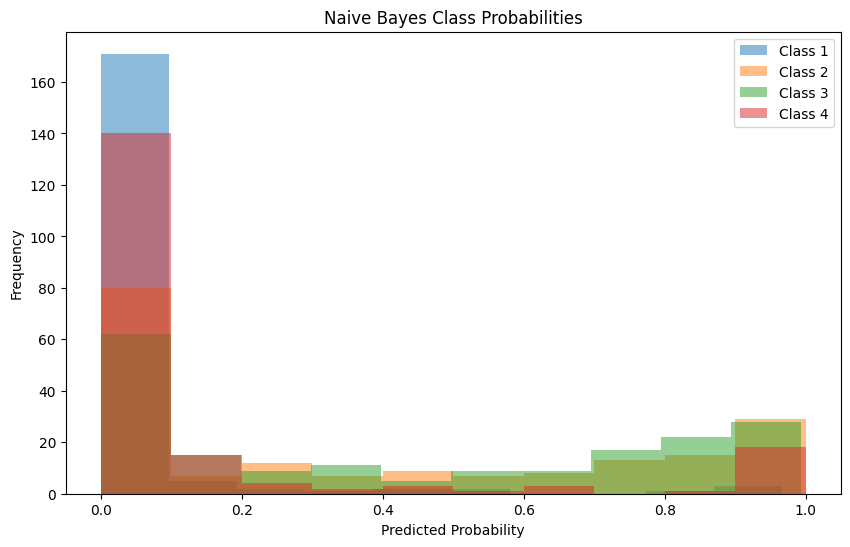

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

probs_nb = nb_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i, class_label in enumerate(nb_model.classes_):
    plt.hist(probs_nb[:, i], bins=10, alpha=0.5, label=f'Class {class_label}')
plt.title("Naive Bayes Class Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [12]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Classifier Performance:
Accuracy: 0.6577540106951871
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        26
           3       0.66      0.99      0.79       124
           4       0.00      0.00      0.00        35

    accuracy                           0.66       187
   macro avg       0.17      0.25      0.20       187
weighted avg       0.44      0.66      0.53       187



c:\Users\Prawn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prawn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prawn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

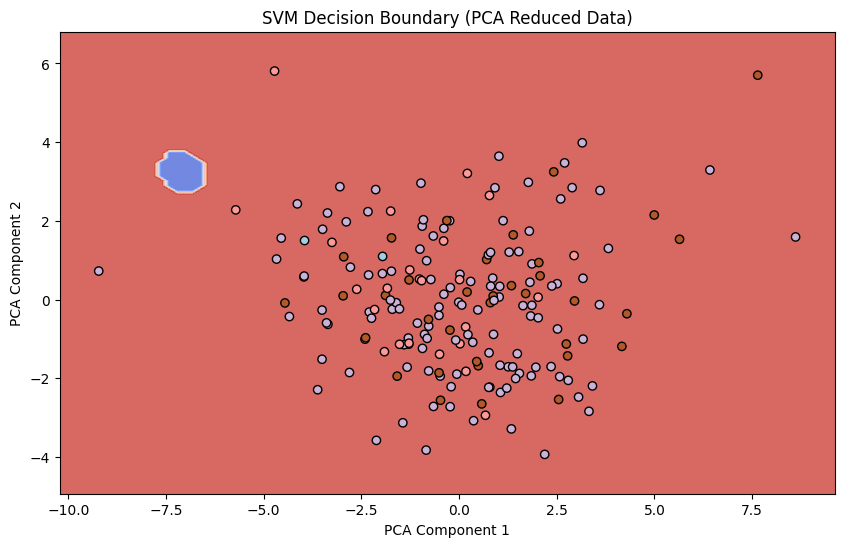

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)
X_train_2d = pca.transform(X_train)

svm_model_2d = SVC(kernel='rbf', random_state=42, decision_function_shape='ovr')
svm_model_2d.fit(X_train_2d, y_train)

xx, yy = np.meshgrid(
    np.linspace(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 100),
    np.linspace(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 100)
)

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Classification Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Classification Tree Performance:
Accuracy: 0.5721925133689839
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.27      0.30        26
           3       0.71      0.70      0.70       124
           4       0.31      0.37      0.34        35

    accuracy                           0.57       187
   macro avg       0.34      0.34      0.33       187
weighted avg       0.57      0.57      0.57       187



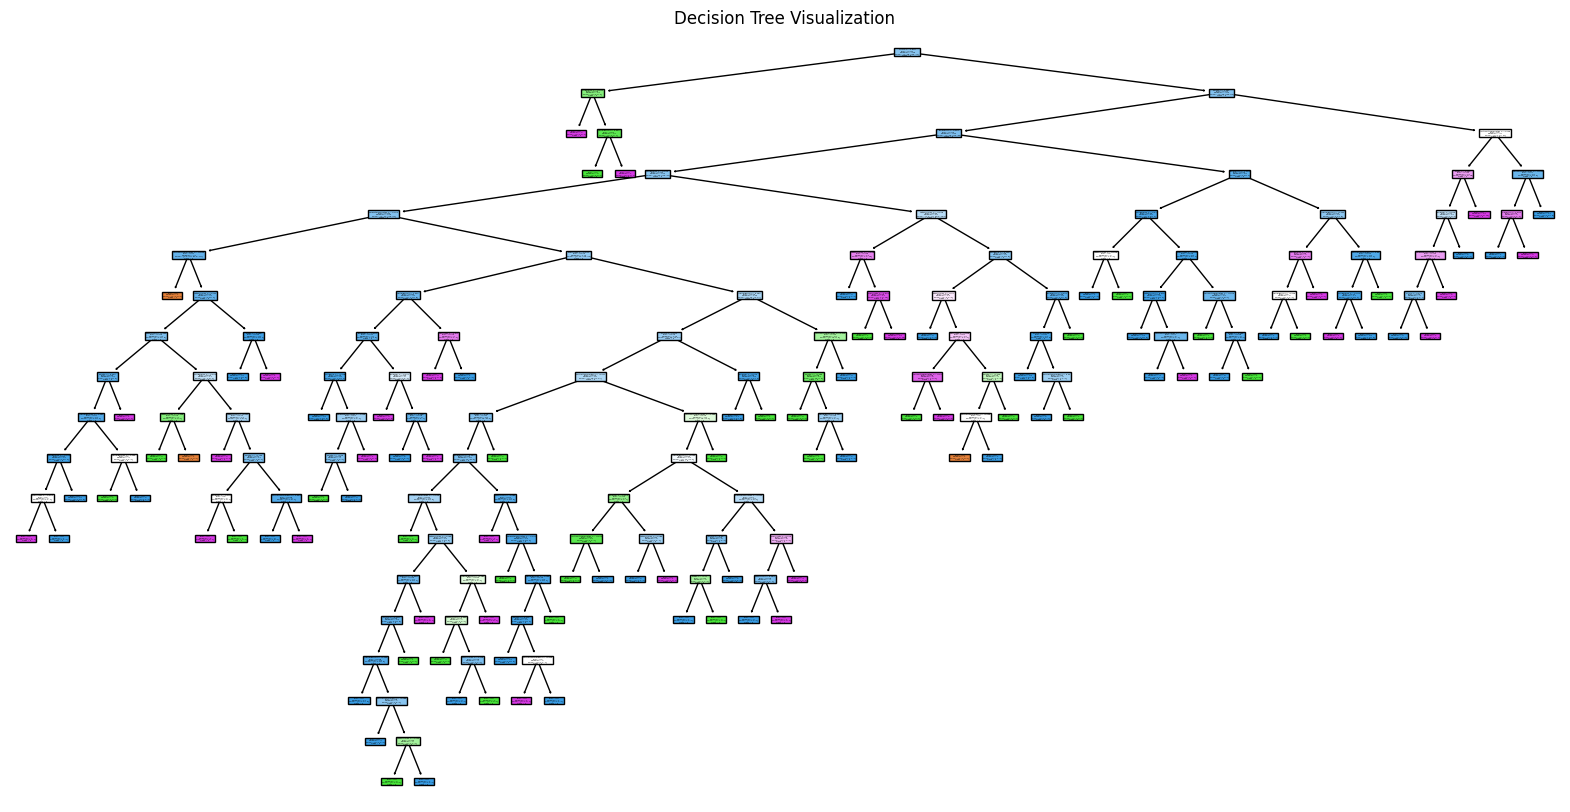

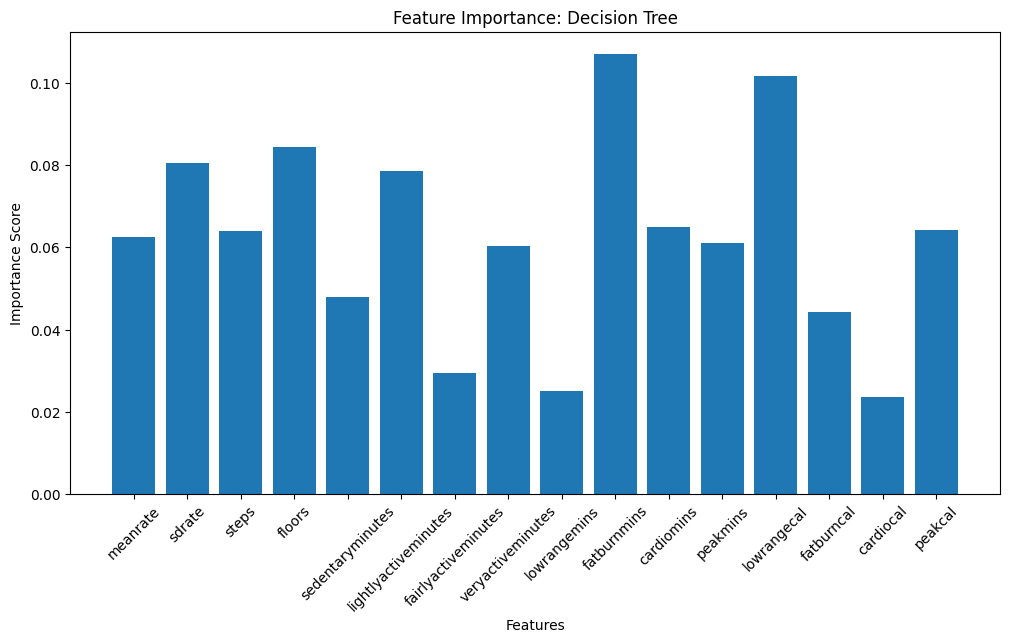

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, class_names=[str(c) for c in tree_model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

feature_importances = tree_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.title("Feature Importance: Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


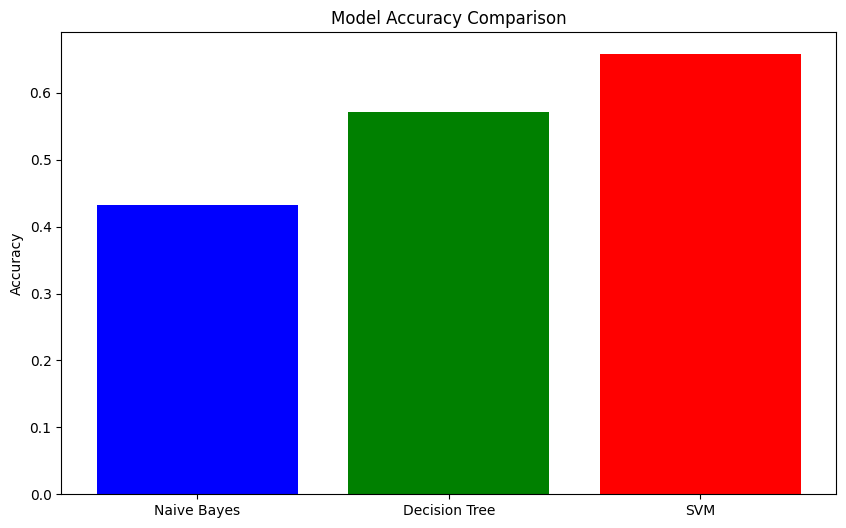

Model Performance Summary:
           Model  Accuracy
0    Naive Bayes  0.433155
1  Decision Tree  0.572193
2            SVM  0.657754


In [ ]:
import pandas as pd

models = ['Naive Bayes', 'Decision Tree', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_svm)
]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

print("Model Performance Summary:")
print(performance_df)
